# Problem statement 
Building a machine learning model to predict the probability of student dropping out of any eduactional institute. 
Due to shortage of time and resources I have used a dataset from kaggle: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention. I will be training several machine learning models and choose the best one for further creating a web page for predicting probability of student dropping out.


### The following steps will be followed in the process.
- Understanding the data
- Exploratory data analysis
- Feature selection
- Training and evaluating the final model using classification metrics
- Exporting the trained model for further predictions 

In [42]:
#importing the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [43]:
#importing the dataset
df=pd.read_csv(r"data\dataset.csv")

In [44]:
#shape of the dataset
df.shape

(3630, 36)

In [45]:
#descriptive statistics about the data to understand it better
df.describe()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,2208.157576,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,1280.169101,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1090.250000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,2191.500000,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,3315.750000,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,4423.000000,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [46]:
#checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      3630 non-null   int64  
 1   Marital status                                  3630 non-null   int64  
 2   Application mode                                3630 non-null   int64  
 3   Application order                               3630 non-null   int64  
 4   Course                                          3630 non-null   int64  
 5   Daytime/evening attendance                      3630 non-null   int64  
 6   Previous qualification                          3630 non-null   int64  
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

All the predictor variables are in numerical data type.

In [47]:
#dropping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
#checking for null values in the data
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

There are no null values in the data

## - Exploratory data analysis

Further we will be analyzing some important features and their impact on the target column

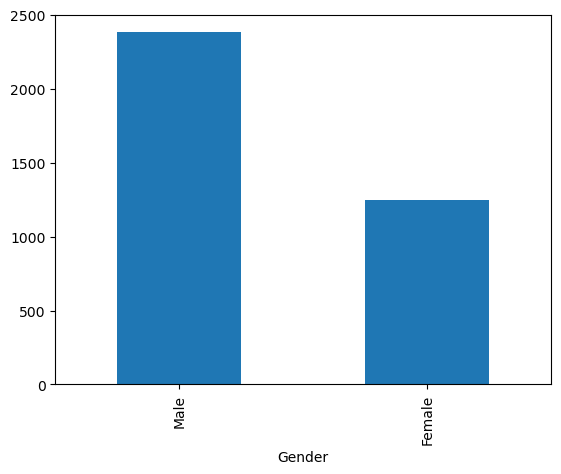

In [48]:
# Gender column
df['Gender'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=["Male","Female"])
plt.show()

There is a higher proportion of male students in the dataset.

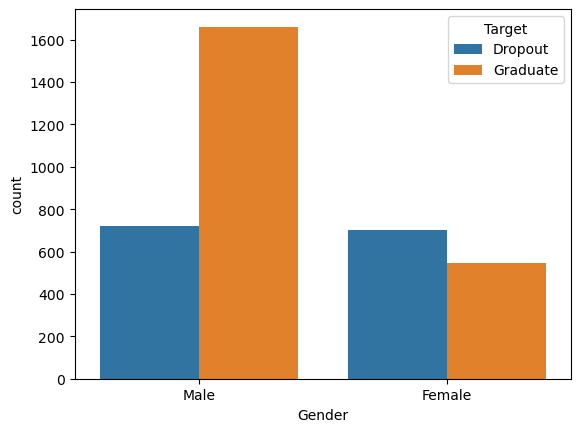

In [49]:
#evaluating gender column against the target column
sns.countplot(x=df['Gender'],hue=df['Target'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show()

A higher proportion of female students dropout in comparison to the male students.

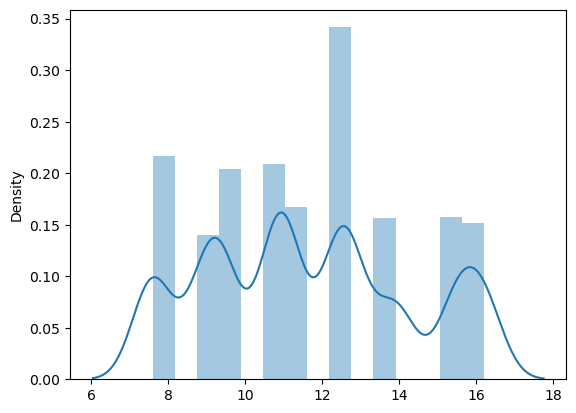

In [50]:
#unemployment rate column
sns.distplot(x=df['Unemployment rate'])
plt.show()

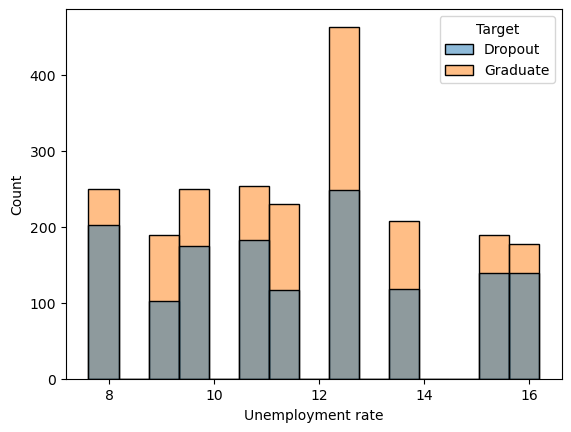

In [51]:
#evaluating unemployment rate column against the target column
sns.histplot(x=df['Unemployment rate'],hue=df['Target'])
plt.show()

We can observe that as the Unemployment rate increases the proportion of students successfully graduating decreases and hence, the count of students dropping out have increased.

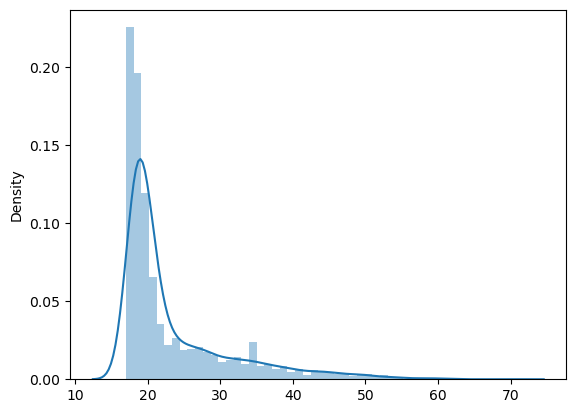

In [52]:
#Age at enrollment column
sns.distplot(x=df['Age at enrollment'])
plt.show()

As expected majority of the students enrolled are from teenage group or young adulthood

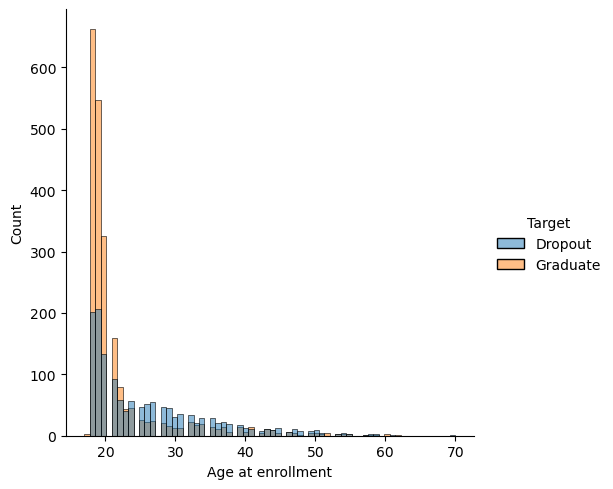

In [53]:
#evaluating Age at enrollment against the target column
sns.displot(x=df['Age at enrollment'],hue=df['Target'])
plt.show()

- Students belonging to age group 18-21 have the least dropout proprtion in the entire dataset
- Students above age of 21 have very low proportion of graduates 

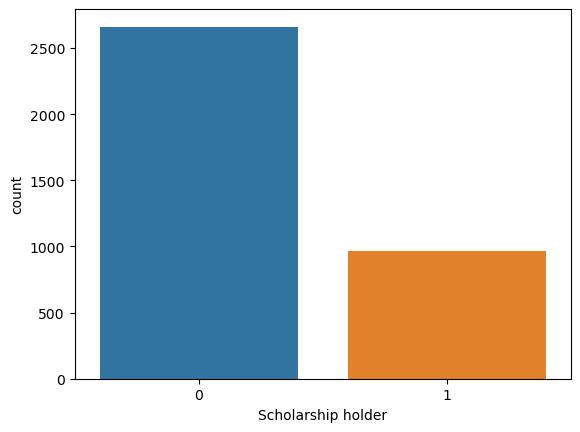

In [54]:
#Scholarship holder column
sns.countplot(x=df['Scholarship holder'])
plt.show()

As expected the proportion of scholarship holders is very low in the dataset

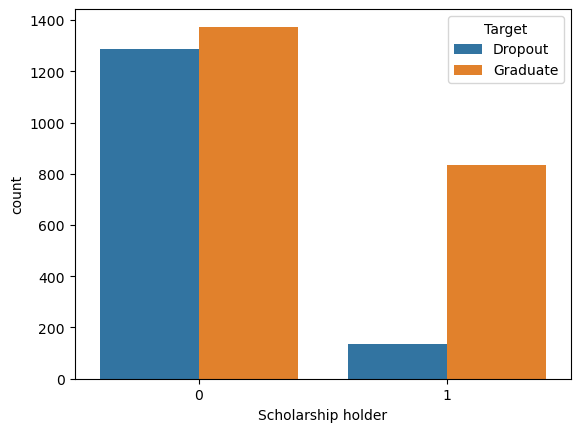

In [55]:
#evaluating Scholarship holder against the target column
sns.countplot(x=df['Scholarship holder'],hue=df['Target'])
plt.show()

Majority of scholarship holder students have completed their graduation while non-scholarship holder students have higher chances of dropping out 

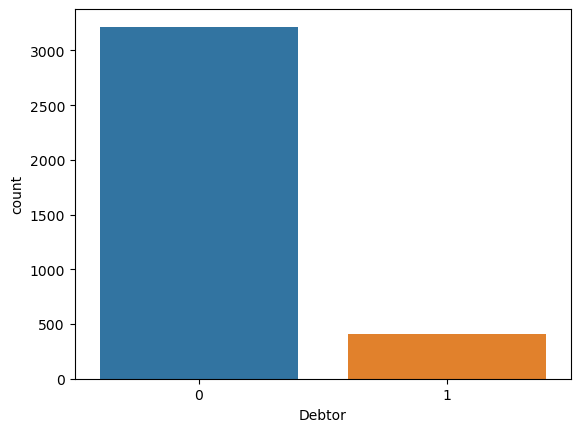

In [56]:
#Debtor column
sns.countplot(x=df["Debtor"])
plt.show()

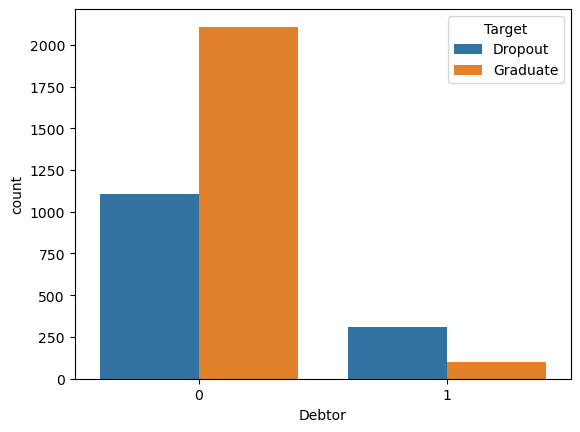

In [57]:
sns.countplot(x=df['Debtor'],hue=df['Target'])
plt.show()

We can observe that debtor students have tremendously high proportion of dropout in comparison to graduate

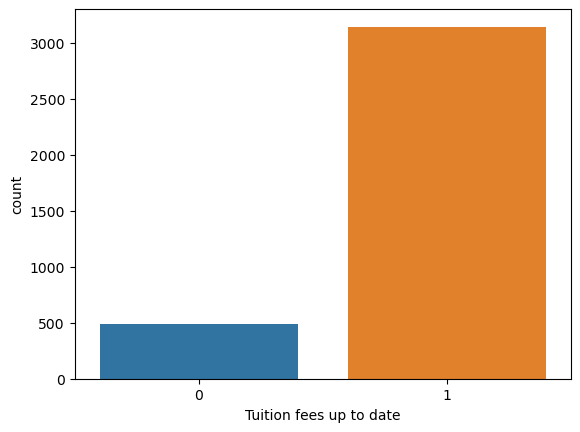

In [58]:
#Tuition fees up to date column
sns.countplot(x=df['Tuition fees up to date'])
plt.show()

Majority of students in the dataset have their tution fees up to date

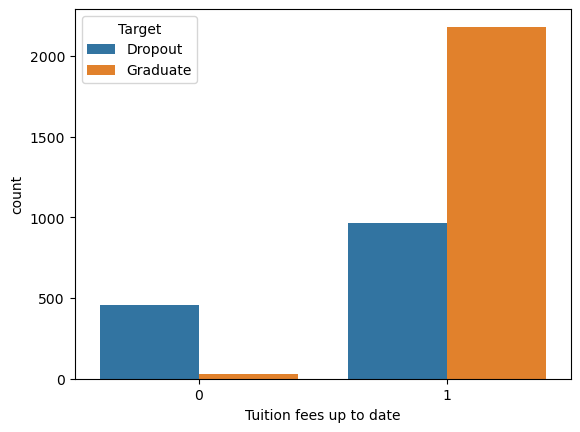

In [59]:
sns.countplot(x=df['Tuition fees up to date'],hue=df['Target'])
plt.show()

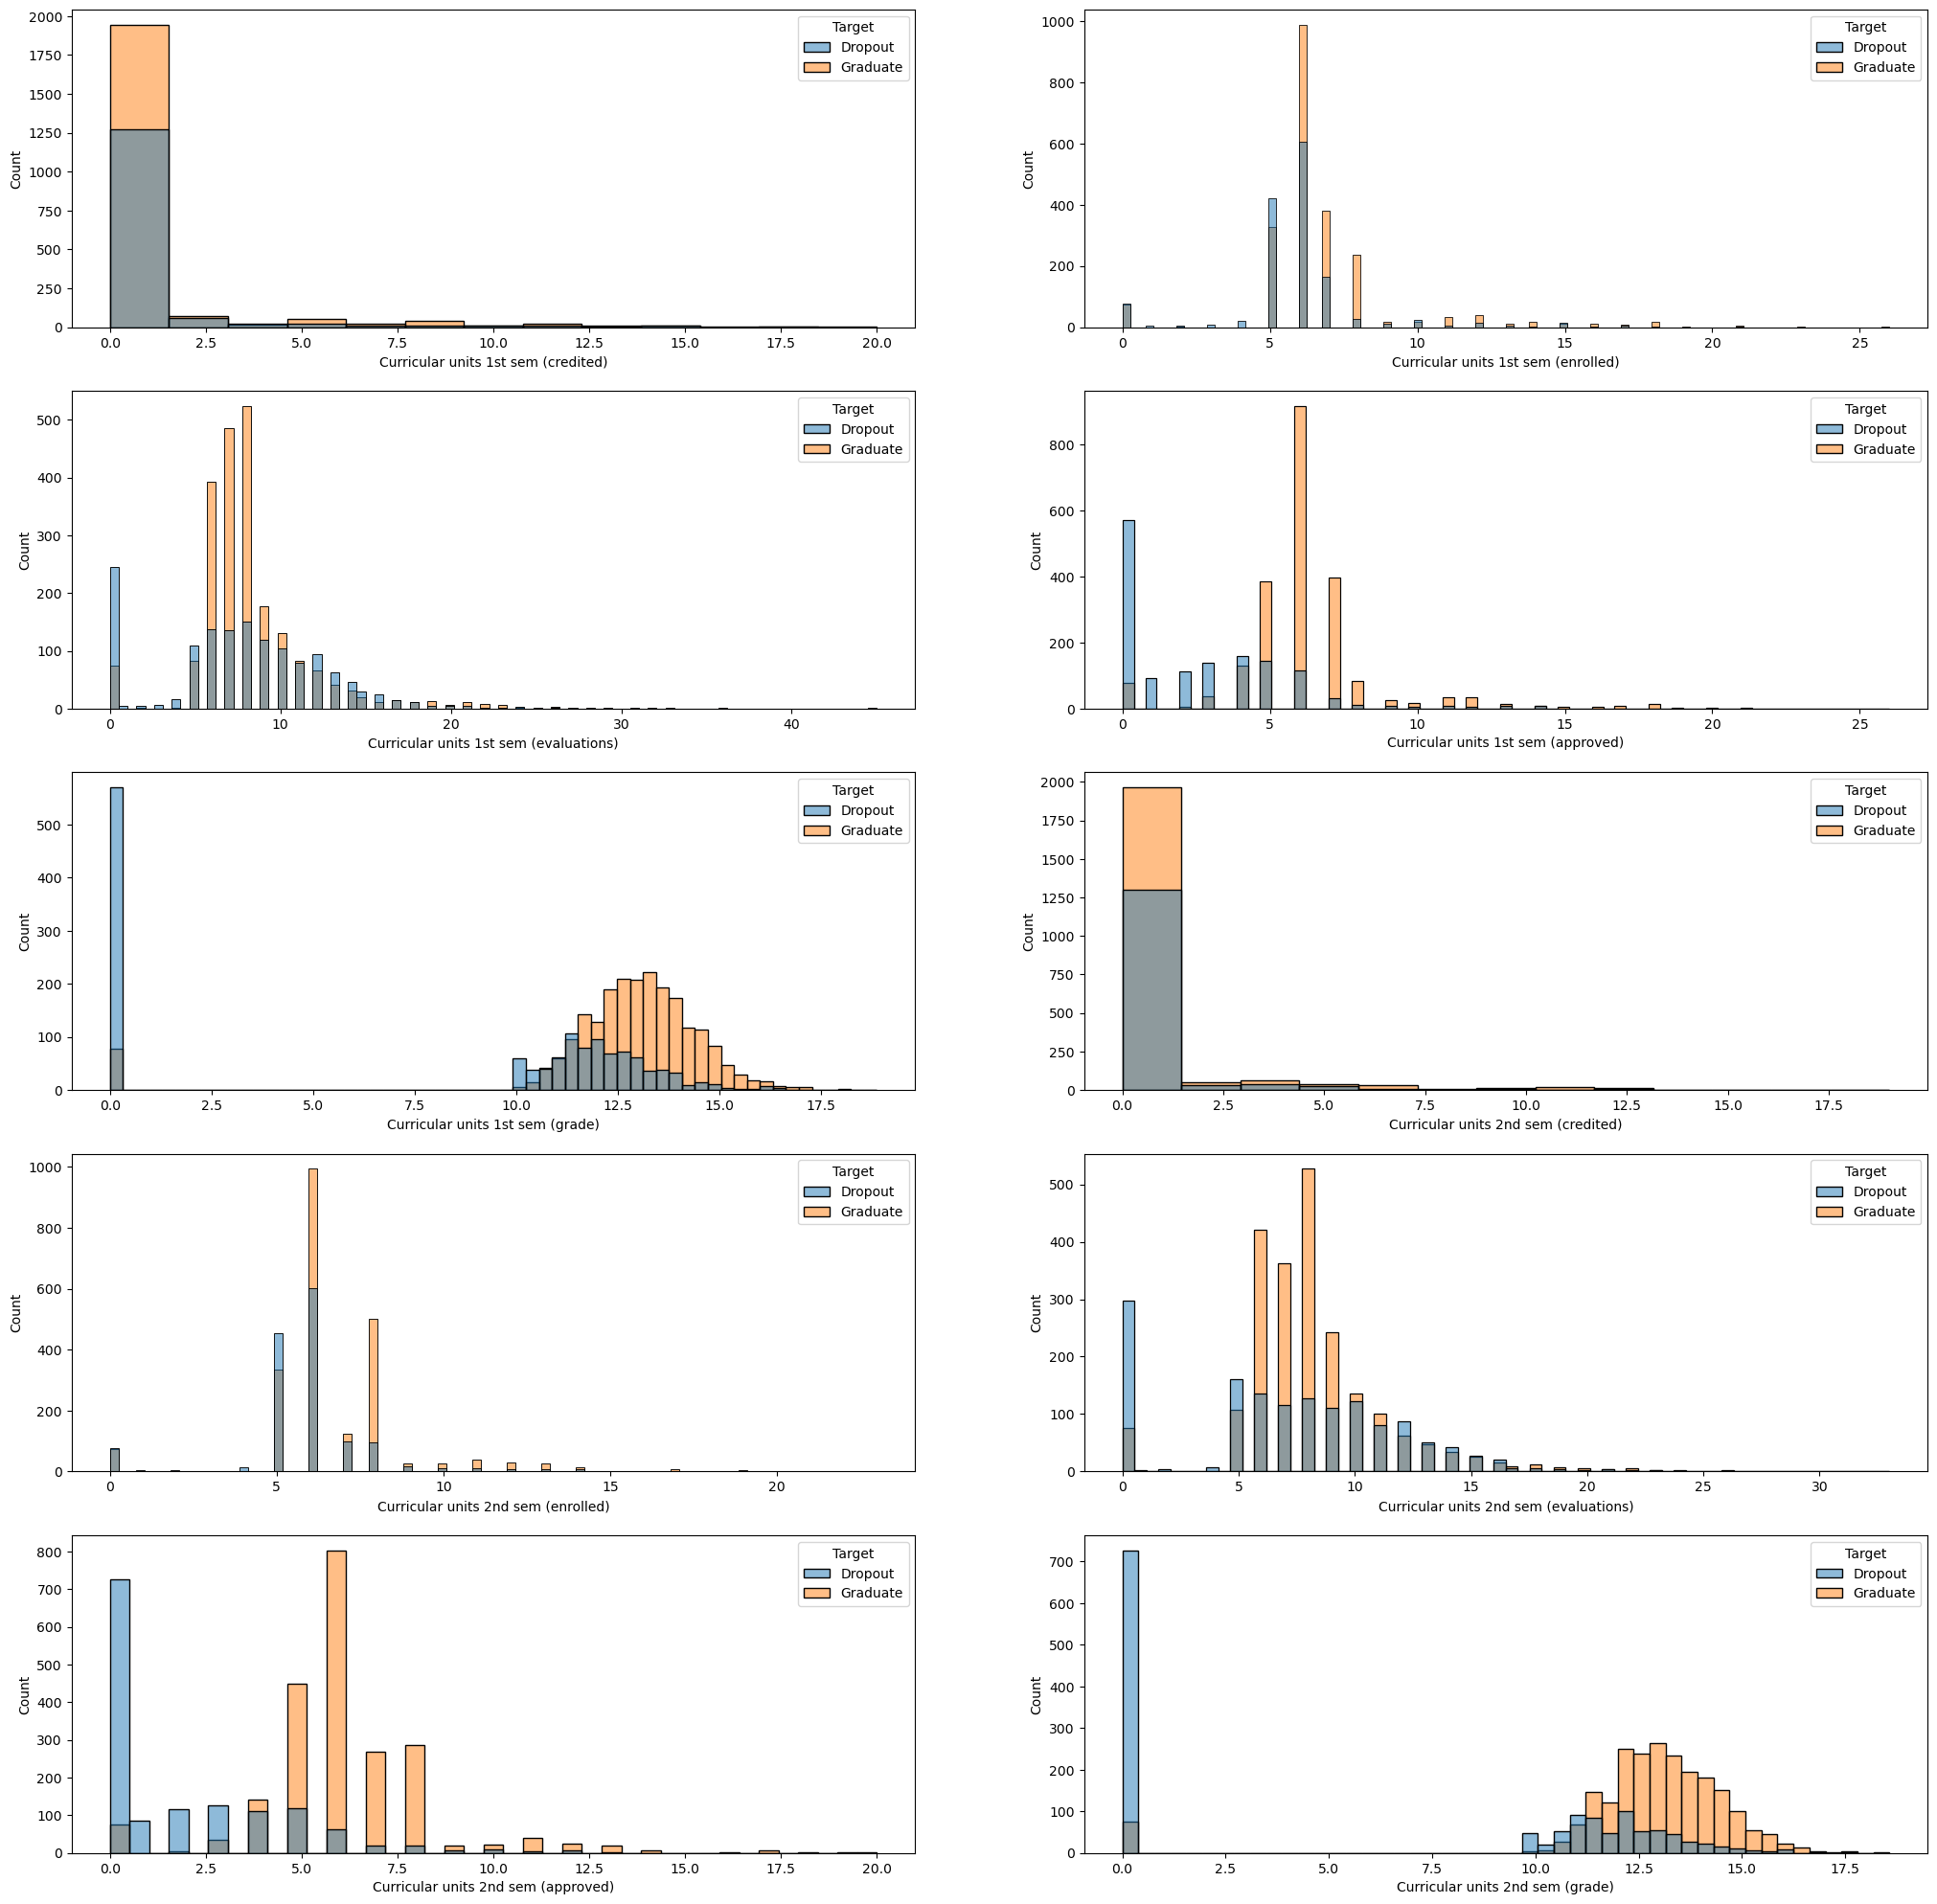

In [60]:
#lets create a single list for all curricular units of both semesters
lst=[
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)']

#plotting the columns with respect to target column using subplot
plt.figure(figsize=[25,25])
for i,j in enumerate(lst):
    plt.subplot(5,2,i+1)
    sns.histplot(x=df[j],hue=df['Target'])

It is observable that the students with less number of circular units are generally more likely to dropout.

In [61]:
#For further training our models we need to convert our target column into numerical datatype
df["Target"].replace({"Graduate":0,'Dropout':1},inplace=True)

Students whose fees are not up to date have a very high probability of dropping out.

## Feature Selection

Since, all the features are already converted into numerical data type. We only need to apply feature selection technique to select the most significant feautures from the entire dataset.  
RFECV will be used as feature selection technique
The following steps will be followed :-
- Training several models with all the features available as base models
- Using RFECV with the best performing estimator to select significant features

In [62]:
#using RFECV(Recursive Feature Elimination with Cross Validation) for selecting the most significat features for our classification model.
#importing the neccessary libraries
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score 
from sklearn.preprocessing import MinMaxScaler

In [63]:
# function to calculate the useful metrics on each model for classification task
def evaluate_metrics(y_true,y_pred):
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)
    auc=roc_auc_score(y_true,y_pred)
    return accuracy,precision,recall,f1,auc

In [64]:
#predictor variables
X=df.drop("Target",axis=1)
#target variable
y=df['Target']
#splitting the dataset into train and test set 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Scaling the features using MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Now we will train each classification model with all the features available and then evaluate them

In [65]:
models={'Logistic regression':LogisticRegression(),
        "SVC":SVC(),
        "K-Neighbors Classifier": KNeighborsClassifier(n_jobs=-1),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(n_jobs=-1),
        "AdaBoost Classifier": AdaBoostClassifier() 
       }

model_list=[]
accuracy_list=[]
#iterate over each model
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
        
    #calculating metrics for train and test set
    train_accuracy,train_precision,train_recall,train_f1,train_auc=evaluate_metrics(y_train,y_train_pred)
    test_accuracy,test_precision,test_recall,test_f1,test_auc=evaluate_metrics(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    print("- F1 score: {:.4f}".format(train_f1))
    print("- Area under curve of ROC : {:.4f}".format(train_auc))

    print('----------------------------------')
    
    print("- Accuracy: {:.4f}".format(test_accuracy))
    print("- Precision: {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    print("- F1 score: {:.4f}".format(test_f1))
    print("- Area under curve of ROC : {:.4f}".format(test_auc))
    accuracy_list.append(test_accuracy)
    
    print('='*35)
    print('\n')

Logistic regression
Model performance for Training set
- Accuracy: 0.9091
- Precision: 0.9239
- Recall: 0.8383
- F1 score: 0.8790
- Area under curve of ROC : 0.8967
----------------------------------
- Accuracy: 0.9050
- Precision: 0.9298
- Recall: 0.8123
- F1 score: 0.8671
- Area under curve of ROC : 0.8872




SVC
Model performance for Training set
- Accuracy: 0.9211
- Precision: 0.9626
- Recall: 0.8322
- F1 score: 0.8926
- Area under curve of ROC : 0.9056
----------------------------------
- Accuracy: 0.8926
- Precision: 0.9307
- Recall: 0.7762
- F1 score: 0.8465
- Area under curve of ROC : 0.8703


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8805
- Precision: 0.9217
- Recall: 0.7614
- F1 score: 0.8339
- Area under curve of ROC : 0.8597
----------------------------------
- Accuracy: 0.8375
- Precision: 0.8630
- Recall: 0.6823
- F1 score: 0.7621
- Area under curve of ROC : 0.8077


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- Area under curve of ROC : 1.0000
----------------------------------
- Accuracy: 0.8388
- Precision: 0.7778
- Recall: 0.8087
- F1 score: 0.7929
- Area under curve of ROC : 0.8331


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Pr

In [66]:
model_performance=pd.DataFrame({"Model":model_list,"Accuracy":accuracy_list}).sort_values('Accuracy',ascending=False)
model_performance

,Model,Accuracy
0,Logistic regression,0.904959
5,AdaBoost Classifier,0.898072
1,SVC,0.892562
4,Random Forest Classifier,0.891185
3,Decision Tree,0.838843
2,K-Neighbors Classifier,0.837466


We can observe that the SVC, logistic regression model are giving the approximately same accuracy among all other models. Now we will select the most significant features using the Logistic Regression estimator because it is easy interpretable.

In [67]:
#Selecting features using RFECV with logistic regression as estimator
rfecv=RFECV(estimator=LogisticRegression(),cv=5,scoring='accuracy',n_jobs=-1)
rfecv.fit(X_train,y_train)

RFECV(cv=5, estimator=LogisticRegression(), n_jobs=-1, scoring='accuracy')

In [68]:
print("The number of significant features selected: {}".format(rfecv.n_features_) )

The number of significant features selected: 19


In [69]:
#let's take a look at the selected features
selected_columns=pd.DataFrame({'Column_name':X.columns.tolist(),'ranking':rfecv.ranking_,'support':rfecv.support_})
selected_columns[selected_columns['support']==True]

,Column_name,ranking,support
0,Marital status,1,True
1,Application mode,1,True
3,Course,1,True
9,Mother's occupation,1,True
13,Debtor,1,True
14,Tuition fees up to date,1,True
16,Scholarship holder,1,True
17,Age at enrollment,1,True
18,International,1,True
19,Curricular units 1st sem (credited),1,True


In [70]:
#storing the significant columns in a list
col=selected_columns[selected_columns['support']==True]["Column_name"].values.tolist()

## Training and evaluating the final model  
Now we will train a logistic regression model using the selected features 

In [71]:
#creating an object of LogisticRegression class
lr=LogisticRegression()
#creating of object of MinMaxScaler class
scale=MinMaxScaler()
#filtering out the selected features from X set
X_selected=X[col]
#splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [72]:
#importing the pipeline class from sklearn
from sklearn.pipeline import Pipeline
#creating a pipeline which will automatically scale the values and predict using the trained model
prediction=Pipeline([
    ('scale',MinMaxScaler()),
    ('Logistic regression',LogisticRegression())
])

In [73]:
#training the model
prediction.fit(X_train,y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('Logistic regression', LogisticRegression())])

In [74]:
#make predictions
y_train_pred=prediction.predict(X_train)
y_test_pred=prediction.predict(X_test)

#calculating metrics for train and test set
train_accuracy,train_precision,train_recall,train_f1,train_auc=evaluate_metrics(y_train,y_train_pred)
test_accuracy,test_precision,test_recall,test_f1,test_auc=evaluate_metrics(y_test,y_test_pred)


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(train_accuracy))
print("- Precision: {:.4f}".format(train_precision))
print("- Recall: {:.4f}".format(train_recall))
print("- F1 score: {:.4f}".format(train_f1))
print("- Area under curve of ROC : {:.4f}".format(train_auc))

print('----------------------------------')

print("- Accuracy: {:.4f}".format(test_accuracy))
print("- Precision: {:.4f}".format(test_precision))
print("- Recall: {:.4f}".format(test_recall))
print("- F1 score: {:.4f}".format(test_f1))
print("- Area under curve of ROC : {:.4f}".format(test_auc))

print('='*35)
print('\n')

Model performance for Training set
- Accuracy: 0.9098
- Precision: 0.9257
- Recall: 0.8383
- F1 score: 0.8798
- Area under curve of ROC : 0.8973
----------------------------------
- Accuracy: 0.9063
- Precision: 0.9372
- Recall: 0.8087
- F1 score: 0.8682
- Area under curve of ROC : 0.8876




Our model is giving the accuracy of __0.9160__ on the test set.  
We can further manage the tradeoff between precision and recall by using the appropriate threshold but since we are interested in calculating the probabilities and not in making hard predictions. Hence, we will export the trained prediction pipeline in the form of pickle file so that we can use it to develop our webpage.

##  Exporting the trained model for further predictions

In [75]:
import pickle
#pickle.dump(prediction,open(prediction_pipeline.pkl','wb'))